<a href="https://colab.research.google.com/github/RuthStowers/MAT421/blob/main/Module_B_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 17- Interpolation**

**17.4 Lagrange polynomial interpolation**

Lagrange polynomial interpolation finds a single polynomial that goes through all the data points, this is called a Lagrange polynomial.

Here are two examples of the Lagrange polynomial interpolation using Python. 

*Example 1:* Find the Lagrange basis polynomials for the data set x = [0, 1, 2] and y = [3, 5, 4]. Plot each polynomial and verify that Pi(xj) = 1 when i = j and Pi(xj) = 0 when i =/ j. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [31]:
x = [1, 1.5, 3.5]
y = [3, 5, 4]

x_new = np.arange(0.5, 4.3, .1)

f = lagrange(x, y)

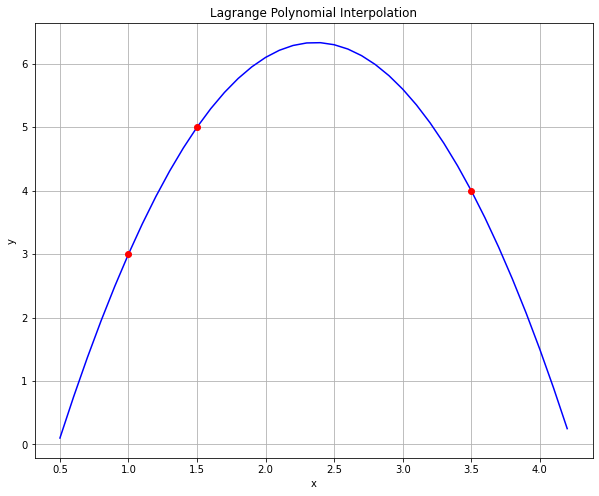

In [32]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*Example 2:* Find the lagrange basis polynomials for the data set x = [4, 6, 8] and y = [2, 4, 3]. Plot each polynomial and verify the property that Pi(xj) = 1 when i = j ans Pi(xj) = 0 when i =/ j. 

In [11]:
x_two = [4, 6, 8]
y_two = [2, 4, 3]

x_new = np.arange(1, 12, .5)

f_two = lagrange(x_two, y_two)

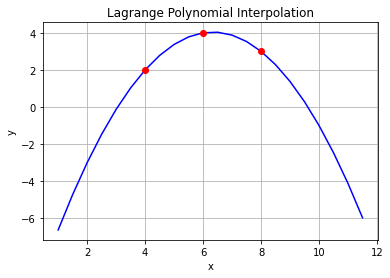

In [12]:
plt.plot(x_new, f_two(x_new), 'b', x_two, y_two, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Warning: Lagrange interpolation should never be used to interpolate outside the region [x1,xn].

**17.5 Newton's polynomial interpolation**

Newton's Polynomial Interpolation is another popular method to fit exactly for a set of data points. The special feature of the Newton’s polynomial is that the coefficients (ai) can be determined using a very simple mathematical procedure.

Here is an example of Newton's polynomial interpolation using Python.

*Example 3:* Calculate the divided differences table for x = [-5, -1, 0, 4] and y = [-2, 4, 0, 3].

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [34]:
def divided_diff(x, y):

  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range (1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef [i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range (1, n+1):
    p = coef[n-k] + (x - x_data[n-k]) * p
  return p


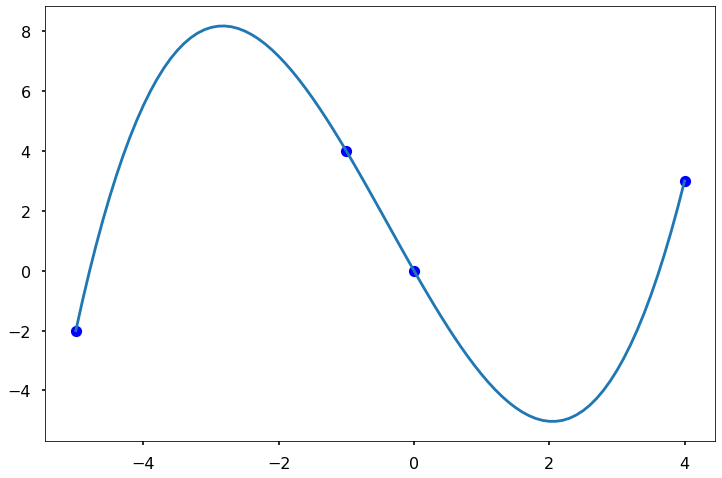

In [42]:
xthree = np.array([-5, -1, 0, 4])
ythree = np.array([-2, 4, 0, 3])

a_s = divided_diff(xthree, ythree) [0, :]

x_neww = np.arange(-5, 4.1, .1)
y_neww = newton_poly(a_s, xthree, x_neww)

plt.figure(figsize = (12,8))
plt.plot(xthree, ythree, 'bo')
plt.plot(x_neww, y_neww)